## Simulation of Diabetes Dataset Using Logistic Regression with Selected Features

TO CHECK THE VERSION OF LIBRARIES

In [1]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.1.0
numpy: 1.14.3
matplotlib: 2.2.2
pandas: 0.23.0
sklearn: 0.19.1


TO IMPORT LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

# To allow plots to appear within the notebook
%matplotlib inline

TO LOAD THE DATASET

In [3]:
dataset = pandas.read_csv('diabetes.csv')

TO DETERMINE THE DIMENSIONS OF THE DATASET

In [4]:
print(dataset.shape)

(768, 9)


TO PEEK AT THE DATA

In [5]:
print(dataset.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


TO SEE THE STATISTICAL SUMMARY

In [6]:
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

TO SEE THE CLASS DISTRIBUTION

In [7]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


TO SHOW THE UNIVARIATE PLOT (BOX and WHISKER PLOTS)

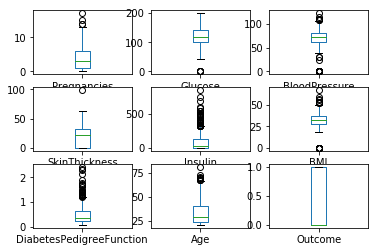

In [8]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plot.show()

TO SHOW THE HISTOGRAM FOR THE DISTRIBUTION

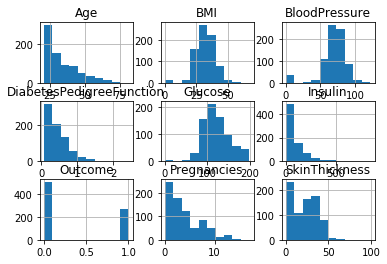

In [9]:
dataset.hist()
plot.show()

FOR THE MULTIVARIATE PLOT

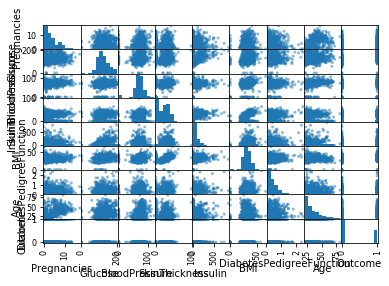

In [10]:
# For the Scatter Plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plot.show()

## To Create Logistic Regression Models with Identified Features to be Used

### A. Using Univariate Selection

Based from the Univariate Selection, the four identified features that have the strongest relationship with the output variable are the following:
1. Glucose
2. Insulin
3. BMI and
4. Age

In [11]:
# To Create the Matrix of Independent Variable, X, that contains Glucose, Insulin, BMI and Age
features = ['Glucose', 'Insulin', 'BMI', 'Age']
X_uni = dataset[features].values

In [12]:
# To Create the Matrix of Independent Variable, Y, that contains the Outcomes
Y_uni = dataset.iloc[:,8].values

In [13]:
# To Import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)

In [14]:
# To Apply K-fold Cross Validation for the Logistic Regression Model Performance
from sklearn.model_selection import KFold
k_Fold = KFold(n_splits=10, shuffle=False, random_state=None)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=logistic_regression, X=X_uni, y=Y_uni, cv=k_Fold, scoring='accuracy')
accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()
print("ACCURACIES IN K-FOLDS:")
print(accuracies)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracies_average)
print('')
print("ACCURACY VARIANCE OF K-FOLDS:")
print(accuracies_variance)
print('')

ACCURACIES IN K-FOLDS:
[0.72727273 0.83116883 0.71428571 0.64935065 0.77922078 0.79220779
 0.77922078 0.81818182 0.76315789 0.78947368]

AVERAGE ACCURACY OF K-FOLDS:
0.7643540669856461

ACCURACY VARIANCE OF K-FOLDS:
0.05130261742650119



In [ ]:
# To Split the Dataset into Training Dataset and Testing Dataset
from sklearn.model_selection import train_test_split
X_uni_train, X_uni_test, Y_uni_train, Y_uni_test = train_test_split(X_uni, Y_uni, test_size = 0.20, random_state = 0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_uni_train, Y_uni_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg_uni = logistic_regression.predict(X_uni_test)

In [ ]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_uni_test, Y_predict_LogReg_uni))

In [ ]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_uni_test, Y_predict_LogReg_uni)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

In [ ]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_uni_test, Y_predict_LogReg_uni))

### B. Using Recursive Feature Elimination

Based from the Recursive Feature Elimination, the four attributes chosen are the following:
1. Pregnancies
2. Glucose
3. BMI, and 
4. DiabetesPedigreeFunction

In [ ]:
# To Create the Matrix of Independent Variable, X, that contains Pregnancies, Glucose, BMI and DiabetesPedigreeFunction
features = ['Pregnancies','Glucose', 'BMI', 'DiabetesPedigreeFunction']
X_rfe = dataset[features].values

In [ ]:
# To Create the Matrix of Independent Variable, Y, that contains the Outcomes
Y_rfe = dataset.iloc[:,8].values

In [ ]:
# To Import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)

In [ ]:
# To Apply K-fold Cross Validation for the Logistic Regression Model Performance
from sklearn.model_selection import KFold
k_Fold = KFold(n_splits=10, shuffle=False, random_state=None)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=logistic_regression, X=X_rfe, y=Y_rfe, cv=k_Fold, scoring='accuracy')
accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()
print("ACCURACIES IN K-FOLDS:")
print(accuracies)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracies_average)
print('')
print("ACCURACY VARIANCE OF K-FOLDS:")
print(accuracies_variance)
print('')

In [ ]:
# To Split the Dataset into Training Dataset and Testing Dataset
from sklearn.model_selection import train_test_split
X_rfe_train, X_rfe_test, Y_rfe_train, Y_rfe_test = train_test_split(X_rfe, Y_rfe, test_size = 0.20, random_state = 0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_rfe_train, Y_rfe_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg_rfe = logistic_regression.predict(X_rfe_test)

In [ ]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_rfe_test, Y_predict_LogReg_rfe))

In [ ]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_rfe_test, Y_predict_LogReg_rfe)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

In [ ]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_rfe_test, Y_predict_LogReg_rfe))

### C. Using Principal Component Analysis

A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.
In this simulation, we will select 4 principal components.

In [ ]:
# To Create the Matrix of Independent Variable, X, that contains all the Features
X = dataset.iloc[:,0:8].values

In [ ]:
# To Create the Matrix of Independent Variable, Y, that contains the Outcomes
Y_pca = dataset.iloc[:,8].values

In [ ]:
# To Import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)

In [ ]:
# To Perform Feature Selection with PCA
from sklearn.decomposition import PCA
selection_method_pca = PCA(n_components=4)
selection_fit_pca = selection_method_pca.fit(X)

# To Apply the PCA in the Independent variable, X
X_pca = selection_method_pca.fit_transform(X)

In [ ]:
# To Apply K-fold Cross Validation for the Logistic Regression Model Performance
from sklearn.model_selection import KFold
k_Fold = KFold(n_splits=10, shuffle=False, random_state=None)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=logistic_regression, X=X_pca, y=Y_pca, cv=k_Fold, scoring='accuracy')
accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()
print("ACCURACIES IN K-FOLDS:")
print(accuracies)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracies_average)
print('')
print("ACCURACY VARIANCE OF K-FOLDS:")
print(accuracies_variance)
print('')

In [ ]:
# To Split the Dataset into Training Dataset and Testing Dataset
from sklearn.model_selection import train_test_split
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca, Y_pca, test_size = 0.20, random_state = 0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_pca_train, Y_pca_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg_pca = logistic_regression.predict(X_pca_test)

In [ ]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_pca_test, Y_predict_LogReg_pca))

In [ ]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_pca_test, Y_predict_LogReg_pca)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

In [ ]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_pca_test, Y_predict_LogReg_pca))

### D. Using Feature Importance

Based from the Feature Importance Selection, the four attributes chosen are the following:
1. Glucose
2. BMI
3. DiabetesPedigreeFunction
4. Age

In [ ]:
# To Create the Matrix of Independent Variable, X, that contains Glucose, BMI, DiabetesPedigreeFunction, and Age
features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction','Age']
X_fi = dataset[features].values

In [ ]:
# To Create the Matrix of Independent Variable, Y, that contains the Outcomes
Y_fi = dataset.iloc[:,8].values

In [ ]:
# To Import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)

In [ ]:
# To Apply K-fold Cross Validation for the Logistic Regression Model Performance
from sklearn.model_selection import KFold
k_Fold = KFold(n_splits=10, shuffle=False, random_state=None)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=logistic_regression, X=X_fi, y=Y_fi, cv=k_Fold, scoring='accuracy')
accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()
print("ACCURACIES IN K-FOLDS:")
print(accuracies)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracies_average)
print('')
print("ACCURACY VARIANCE OF K-FOLDS:")
print(accuracies_variance)
print('')

In [ ]:
# To Split the Dataset into Training Dataset and Testing Dataset
from sklearn.model_selection import train_test_split
X_fi_train, X_fi_test, Y_fi_train, Y_fi_test = train_test_split(X_fi, Y_fi, test_size = 0.20, random_state = 0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_fi_train, Y_fi_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg_fi = logistic_regression.predict(X_fi_test)

In [ ]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_fi_test, Y_predict_LogReg_fi))

In [ ]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_fi_test, Y_predict_LogReg_fi)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

In [ ]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_fi_test, Y_predict_LogReg_fi))

##### earoxas2019 & rgdeluna2018